In [297]:
import pandas as pd

df = pd.read_csv('titanic.csv')

# Fill the missing values of Age with the median values
df["Age"] = df["Age"].fillna(df["Age"].median())
df.isna().sum()


df["hasCabin"] = df["Cabin"].notna()
df = df.drop(columns=["Cabin"])


def remove_outliers(df:pd.DataFrame, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    return df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]


df = remove_outliers(df, "Age")
df = remove_outliers(df, "Fare")
df.describe()
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
hasCabin       0
dtype: int64

In [298]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,hasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,False


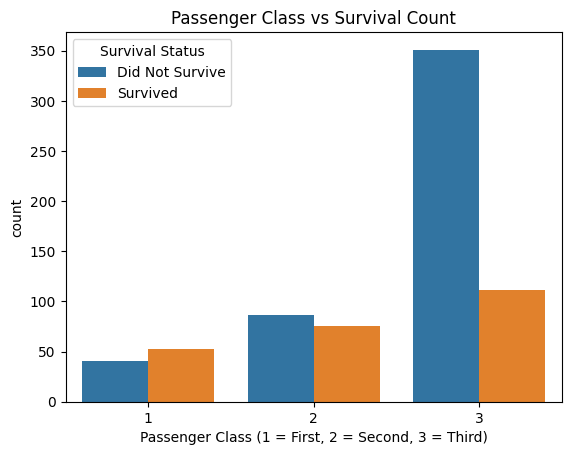

In [299]:
# Count Plot to show how many people survived

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x="Pclass", hue="Survived")

plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.title("Passenger Class vs Survival Count")
plt.show()



<Axes: xlabel='Age', ylabel='Count'>

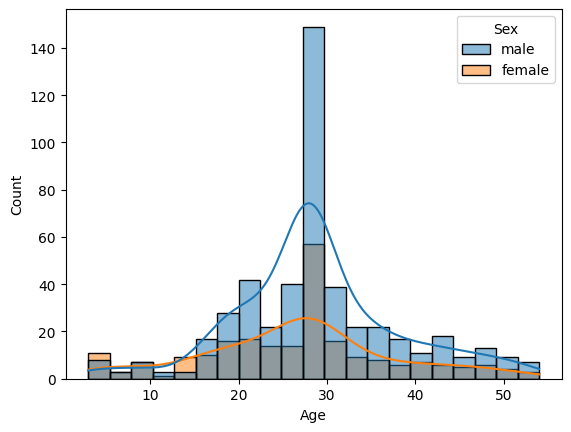

In [300]:
sns.histplot(df, x="Age", hue="Sex", kde=True)

<Axes: xlabel='Sex', ylabel='count'>

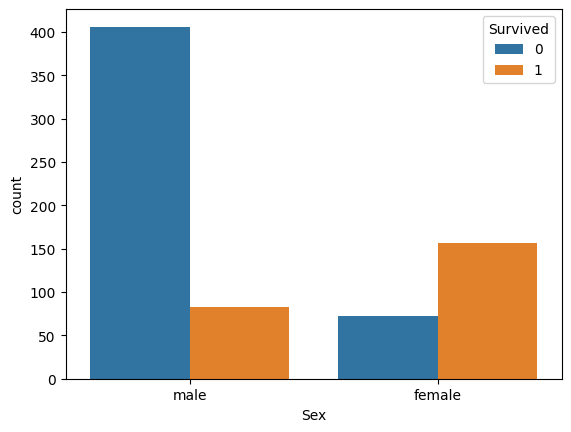

In [301]:
sns.countplot(df,x="Sex", hue="Survived")

<Axes: xlabel='Age', ylabel='Count'>

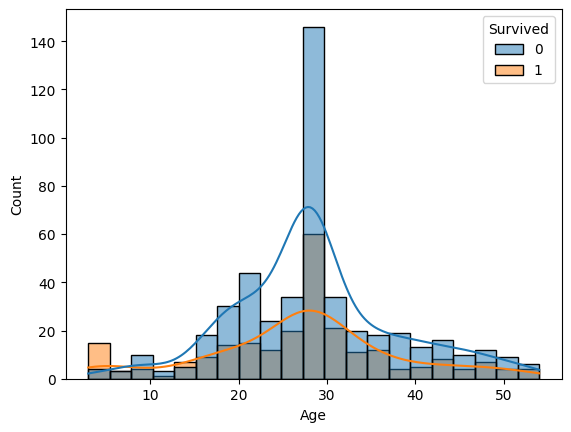

In [302]:
sns.histplot(df,x="Age", hue="Survived", kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

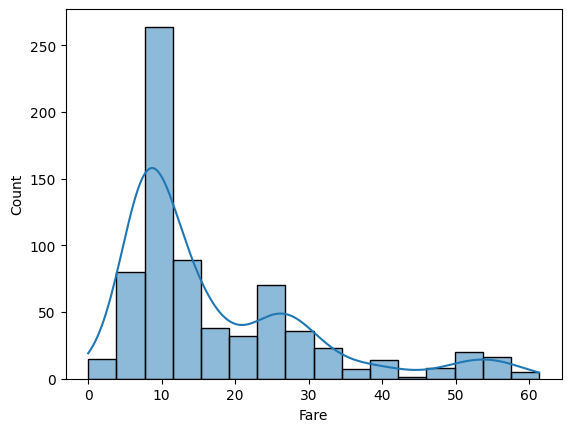

In [303]:
sns.histplot(data=df, x='Fare', kde=True)

<Axes: xlabel='Age', ylabel='Fare'>

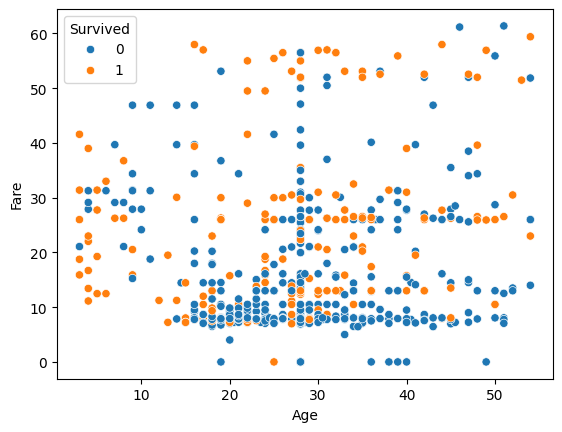

In [304]:
sns.scatterplot(df,x="Age", y="Fare", hue="Survived")

In [305]:
df.corr(numeric_only=True)["Survived"].sort_values(ascending=False)

Survived       1.000000
hasCabin       0.255459
Fare           0.247519
Parch          0.070732
SibSp          0.002503
PassengerId   -0.042128
Age           -0.063606
Pclass        -0.268318
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='Age'>

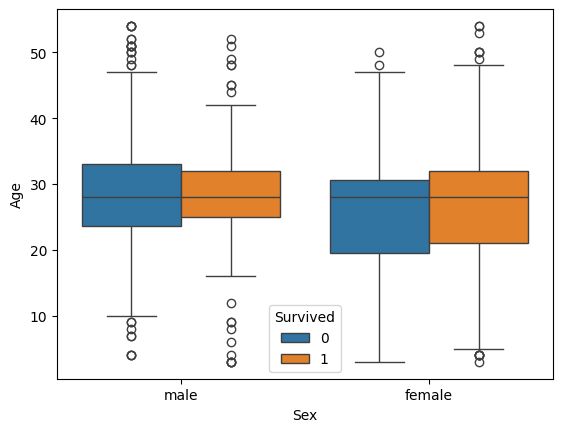

In [306]:
sns.boxplot(df, x="Sex", y="Age", hue="Survived")


In [307]:
plt.scatter(df.index, df["Age"])

TypeError: scatter() missing 1 required positional argument: 'y'